In [1]:
from sift import Sift
from skimage.color import rgb2gray
from skimage import data, transform
import  numpy as np
from skimage.morphology import binary_dilation,rectangle
# from scipy.ndimage import binary_dilation # WARNING
from matplotlib import pyplot as plt
from skimage.feature import hessian_matrix

In [2]:
img_orig = data.rocket()
img  = rgb2gray(img_orig)

In [3]:
sift = Sift(img)

In [4]:
# sift.sigmas_array = [1.6,  np.sqrt(2)*1.6, 2*1.6, np.sqrt(2)*2*1.6]
# I choose better sigmas :)
sift.sigmas_array = [1.6,  np.sqrt(2)*1.6, 2*1.6, np.sqrt(2)*2*1.6, 3*1.6]

In [5]:
sift.sigmas_array

[1.6, 2.2627416997969525, 3.2, 4.525483399593905, 4.800000000000001]

Number of keypoinst candidate: 517


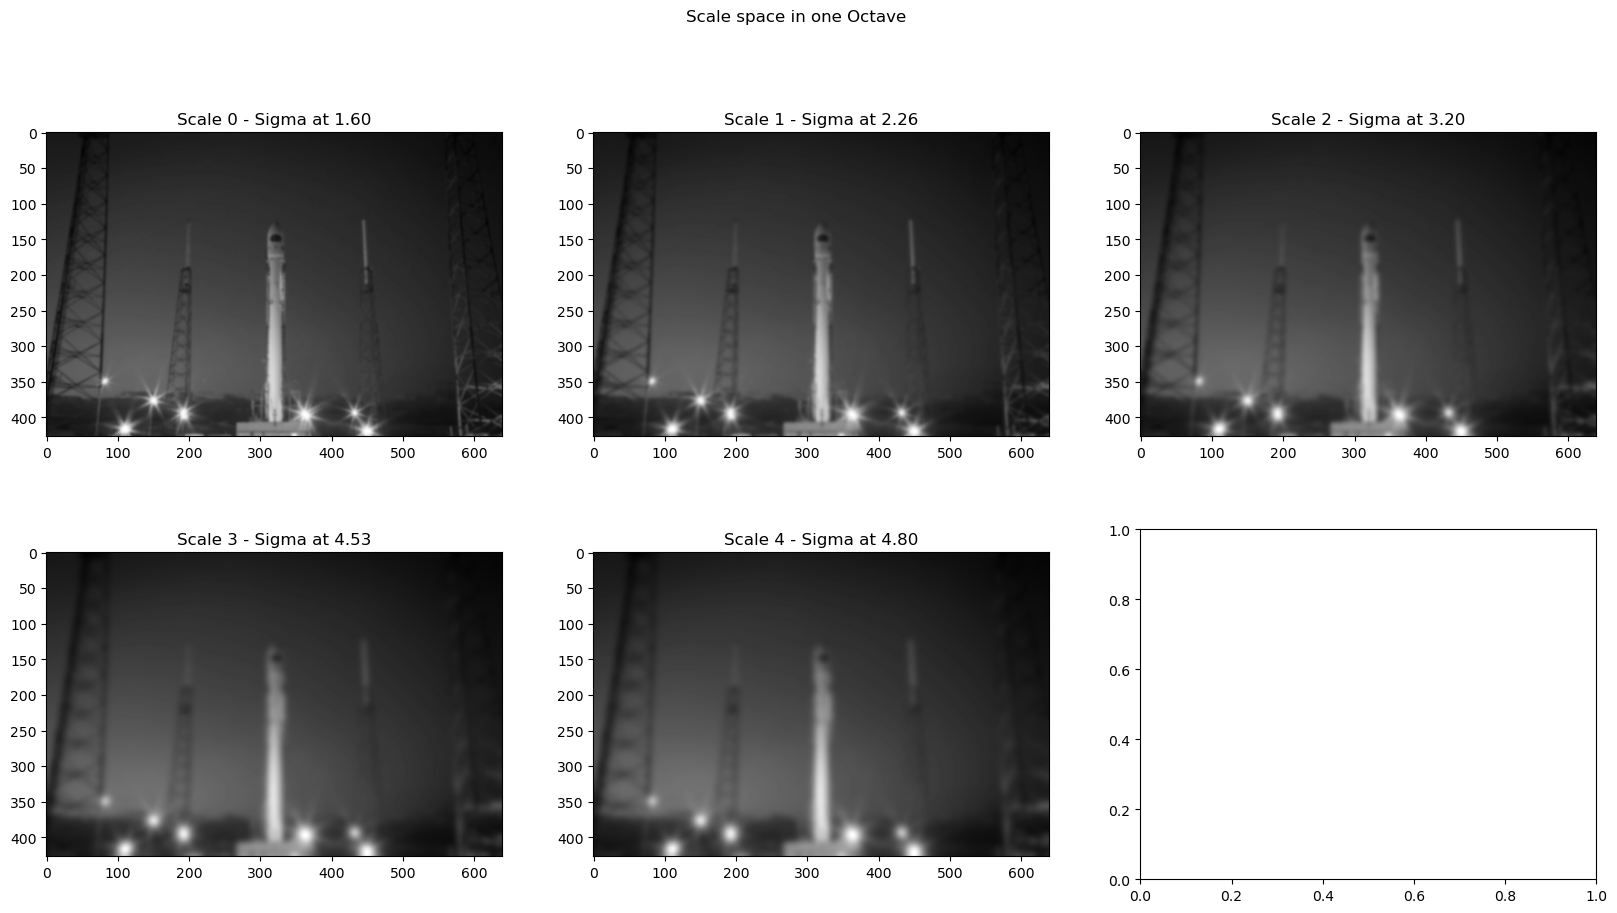

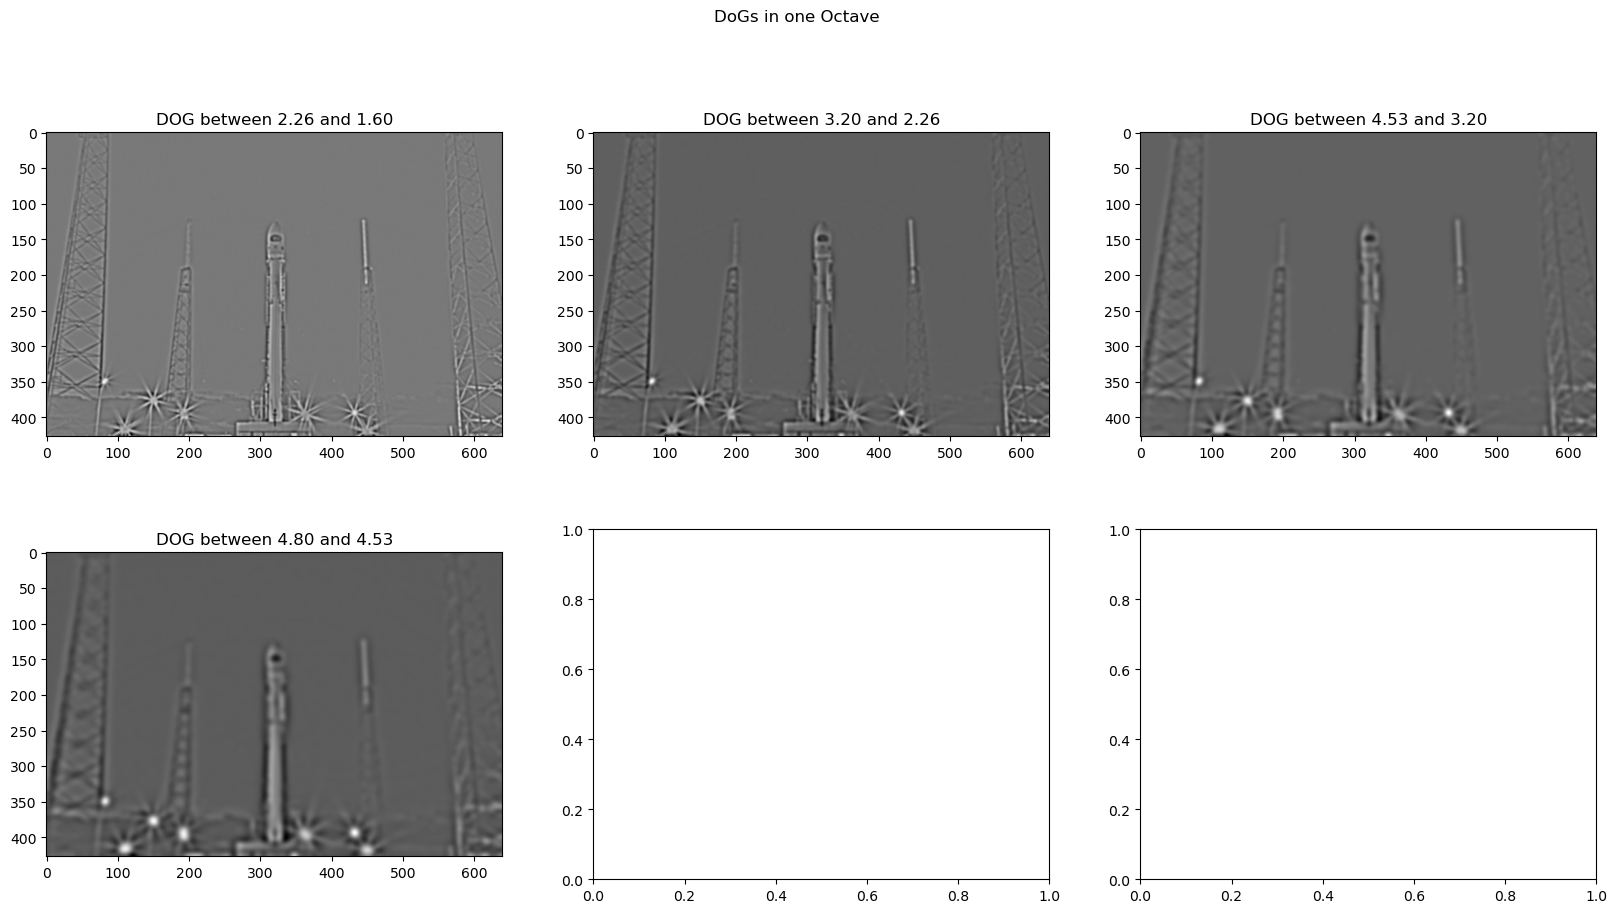

<Figure size 2000x2000 with 0 Axes>

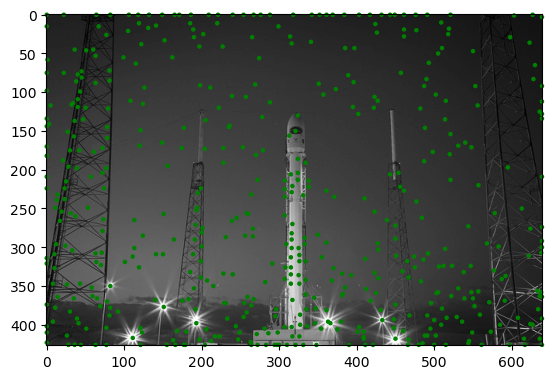

In [6]:
sift.octave_processing(image=sift.image, octave_scale_multiplier=1, sigmas=sift.sigmas_array, visualization=True)

In [7]:
sift.octave_processing(image=sift.image, octave_scale_multiplier=2, sigmas=sift.sigmas_array, visualization=False)
sift.octave_processing(image=sift.image, octave_scale_multiplier=0.5, sigmas=sift.sigmas_array, visualization=False)

Number of keypoinst candidate: 850
Number of keypoinst candidate: 808


In [8]:
sift.octave_keypoins_global_array[0]

array([[ True, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False,  True]])

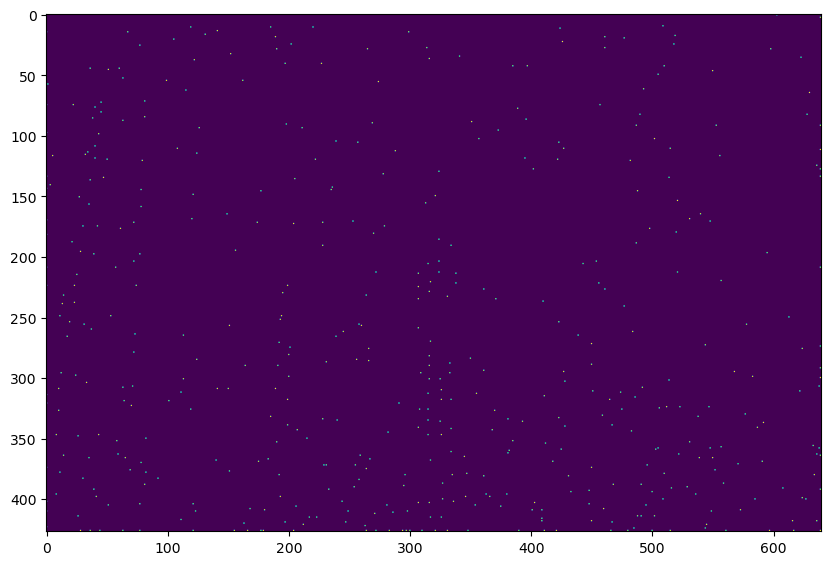

In [9]:
plt.figure(figsize=(10,10))
plt.imshow(sift.octave_keypoins_global_array[0])

/var/folders/mt/zbsgqls91d5c1dt725ckq4lc0000gn/T/ipykernel_90364/998741739.py:3: FutureWarning: `selem` is a deprecated argument name for `binary_dilation`. It will be removed in version 1.0. Please use `footprint` instead.
  plt.imshow(binary_dilation(sift.octave_keypoins_global_array[0],selem=rectangle(3,3)))


Text(0.5, 1.0, 'Detected key points of Octave at native resolution')

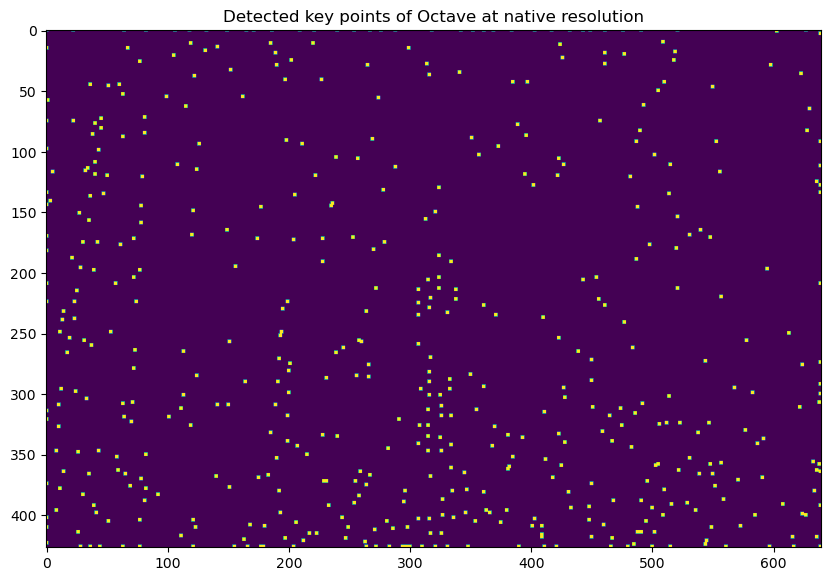

In [10]:
plt.figure(figsize=(10,10))
# For easy visualization
plt.imshow(binary_dilation(sift.octave_keypoins_global_array[0],selem=rectangle(3,3)))
plt.title("Detected key points of Octave at native resolution")

# FILTERring
## Image frame filter
- Student write code

In [11]:
sift.key_point_filter_image_frame(img_shape=img.shape)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 1., ..., 1., 1., 0.],
       [0., 1., 1., ..., 1., 1., 0.],
       ...,
       [0., 1., 1., ..., 1., 1., 0.],
       [0., 1., 1., ..., 1., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

/var/folders/mt/zbsgqls91d5c1dt725ckq4lc0000gn/T/ipykernel_90364/276862385.py:3: FutureWarning: `selem` is a deprecated argument name for `binary_dilation`. It will be removed in version 1.0. Please use `footprint` instead.
  plt.imshow(binary_dilation(sift.octave_keypoins_global_array[0] * sift.key_point_filter_image_frame(img_shape=img.shape),selem=rectangle(3,3)))


Text(0.5, 1.0, 'Detected key points of Octave at native resolution')

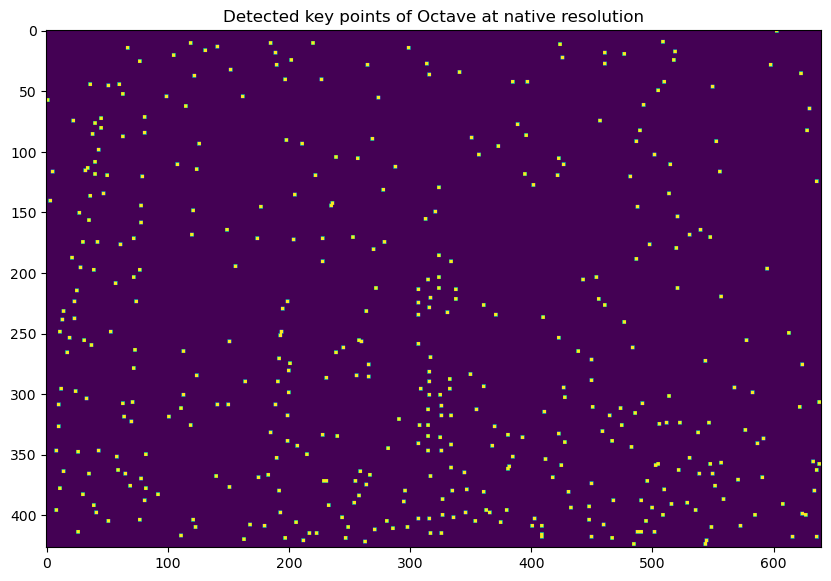

In [12]:
plt.figure(figsize=(10,10))
# For easy visualization
plt.imshow(binary_dilation(sift.octave_keypoins_global_array[0] * sift.key_point_filter_image_frame(img_shape=img.shape),selem=rectangle(3,3)))
plt.title("Detected key points of Octave at native resolution")

## Low contrast remove

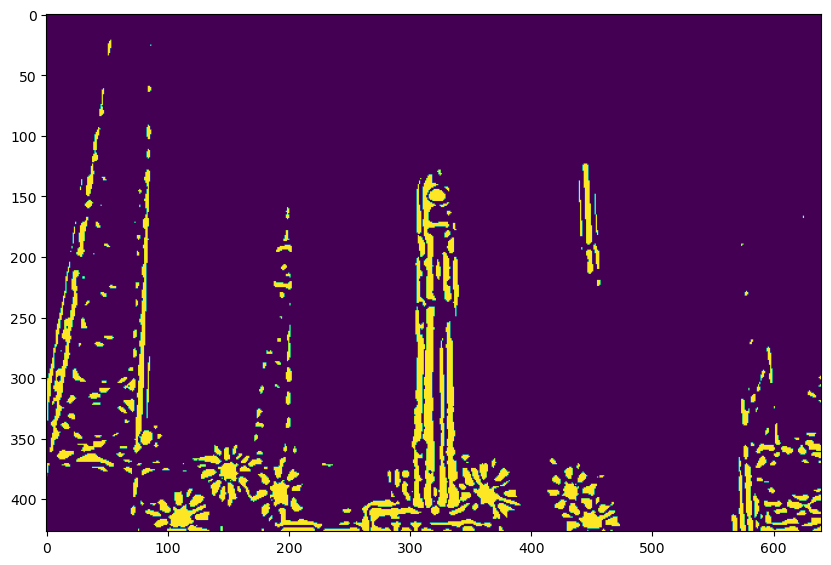

In [13]:
plt.figure(figsize=(10,10))
plt.imshow(sift.key_point_filter_contrast(sift.dog_global_array[0],0.01))

In [14]:
filter_low_contrast = sift.key_point_filter_contrast(sift.dog_global_array[0], 0.01)

/var/folders/mt/zbsgqls91d5c1dt725ckq4lc0000gn/T/ipykernel_90364/2310981042.py:3: FutureWarning: `selem` is a deprecated argument name for `binary_dilation`. It will be removed in version 1.0. Please use `footprint` instead.
  plt.imshow(binary_dilation(sift.octave_keypoins_global_array[0] *


Text(0.5, 1.0, 'Detected key points of Octave at native resolution')

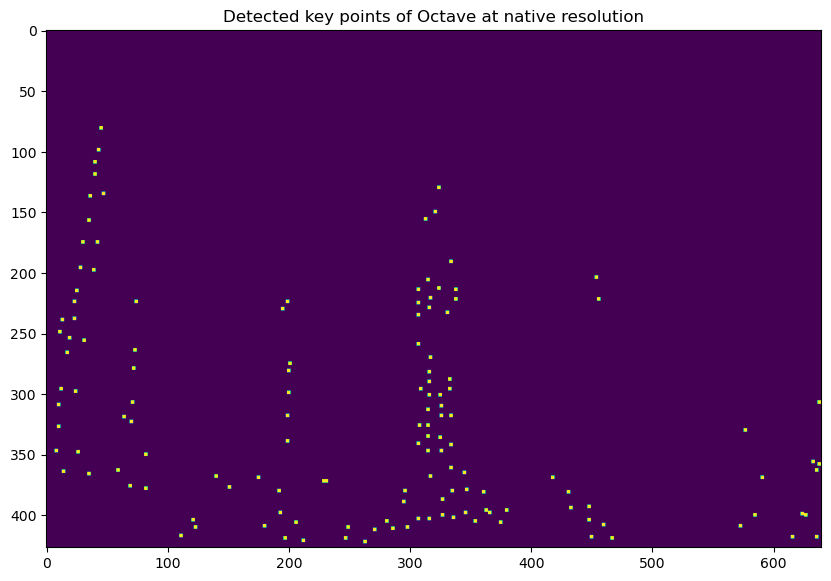

In [15]:
plt.figure(figsize=(10,10))
# For easy visualization
plt.imshow(binary_dilation(sift.octave_keypoins_global_array[0] *
                           sift.key_point_filter_image_frame(img_shape=img.shape) *
                           sift.key_point_filter_contrast(sift.dog_global_array[0], 0.01)
                           ,selem=rectangle(3,3)))
plt.title("Detected key points of Octave at native resolution")

<Figure size 2000x2000 with 0 Axes>

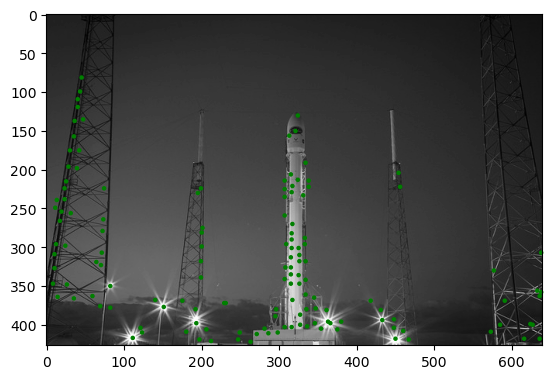

In [16]:
plt.figure(figsize=(20,20))
fig, ax = plt.subplots()
rr, cc = np.where(sift.octave_keypoins_global_array[0] *
                  sift.key_point_filter_image_frame(img_shape=img.shape) *
                  sift.key_point_filter_contrast(sift.dog_global_array[0], 0.01))
ax.imshow(img, cmap="gray")
for r,c in zip(rr,cc):
    circle1 = plt.Circle((c, r), 2, color='g', clip_on=False)
    ax.add_patch(circle1)

## Removing (keypoint) edges
### Calc hessian

In [17]:
# Calculate hessian
# H = [Dxx Dxy]
#     [Dxy Dyy]

Dxx, Dxy, Dyy = hessian_matrix(sift.dog_global_array[0][:,:, 0], sigma=0, order='xy')

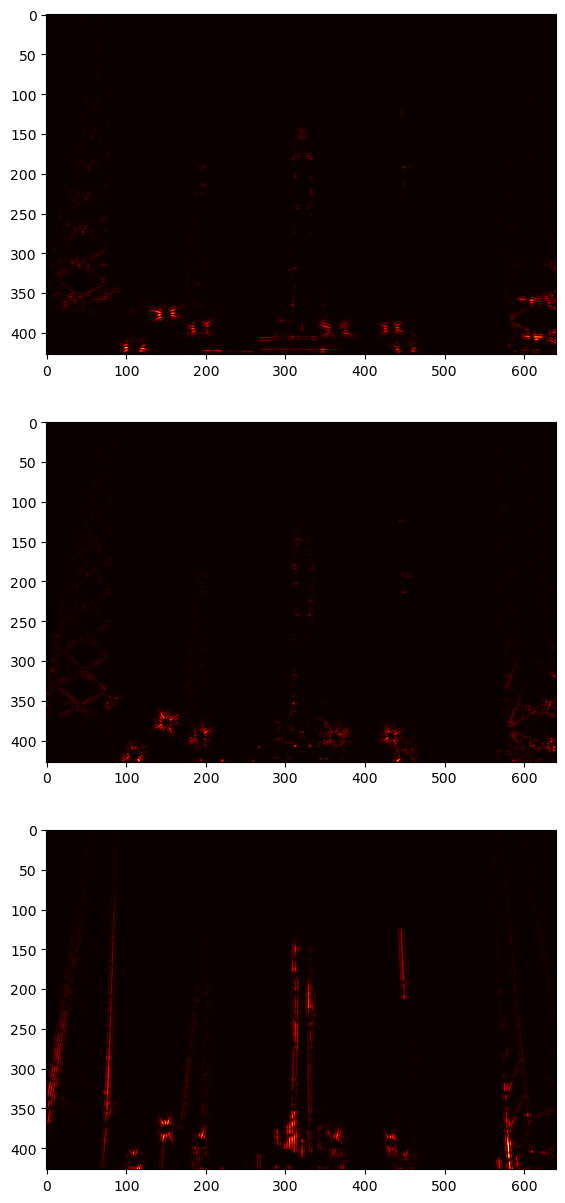

In [18]:
plt.figure(figsize=(8,15))
plt.subplot(311)
plt.set_cmap('hot')
plt.imshow(Dxx**2) # Gradient change in Y axis
plt.subplot(312)
plt.imshow(Dxy**2) # Gradient change in XY axis
plt.subplot(313)
plt.imshow(Dyy**2) # Gradient change in X axis

### Principle curvature ratio
We need calculate trace and determinant from second partial derivation of image [math solution - chapter 4.1](../_materials/sift_highlighted.pdf)

In [19]:
trace_h = Dxx+Dyy
det_h = Dxx*Dyy- Dxy**2
principal_curv_ratio  = trace_h**2 /det_h

In [20]:
r = 10 # paper recommendation
removed_edge_points  = principal_curv_ratio < ((r+1)**2)/r
removed_edge_points

array([[False,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True, False,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True, False,  True],
       [ True,  True,  True, ...,  True,  True,  True]])

/var/folders/mt/zbsgqls91d5c1dt725ckq4lc0000gn/T/ipykernel_90364/1474458759.py:3: FutureWarning: `selem` is a deprecated argument name for `binary_dilation`. It will be removed in version 1.0. Please use `footprint` instead.
  plt.imshow(binary_dilation(sift.octave_keypoins_global_array[0] *


Text(0.5, 1.0, 'Detected key points of Octave at native resolution')

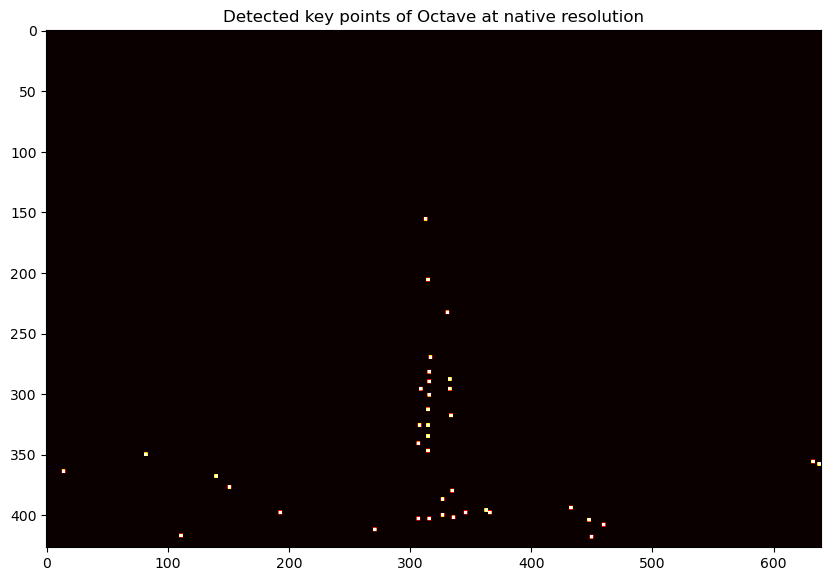

In [21]:
plt.figure(figsize=(10,10))
# For easy visualization
plt.imshow(binary_dilation(sift.octave_keypoins_global_array[0] *
                           sift.key_point_filter_image_frame(img_shape=img.shape) *
                           sift.key_point_filter_contrast(sift.dog_global_array[0], 0.03)
                           ,selem=rectangle(3,3)))
plt.title("Detected key points of Octave at native resolution")

/var/folders/mt/zbsgqls91d5c1dt725ckq4lc0000gn/T/ipykernel_90364/1587963952.py:3: FutureWarning: `selem` is a deprecated argument name for `binary_dilation`. It will be removed in version 1.0. Please use `footprint` instead.
  plt.imshow(binary_dilation(sift.octave_keypoins_global_array[0] *


Text(0.5, 1.0, 'Detected key points of Octave at native resolution')

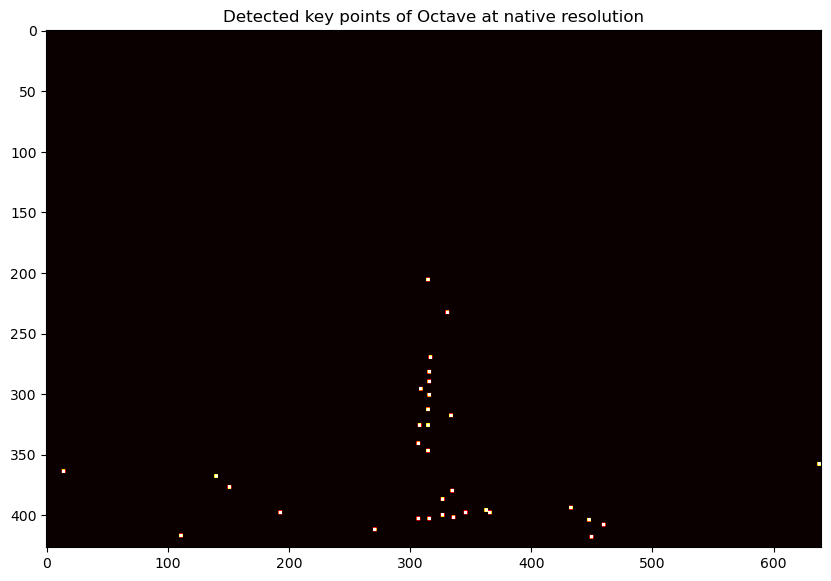

In [22]:
plt.figure(figsize=(10,10))
# For easy visualization
plt.imshow(binary_dilation(sift.octave_keypoins_global_array[0] *
                           sift.key_point_filter_image_frame(img_shape=img.shape) *
                           sift.key_point_filter_contrast(sift.dog_global_array[0], 0.03) *
                           removed_edge_points
                           ,selem=rectangle(3,3)))
plt.title("Detected key points of Octave at native resolution")

ValueError: operands could not be broadcast together with shapes (427,640) (214,320) 

<Figure size 2000x2000 with 0 Axes>

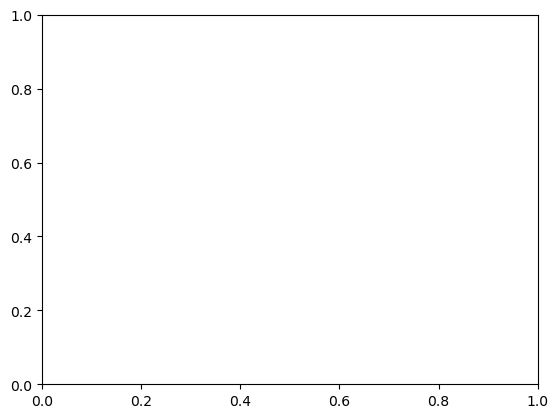

In [30]:
plt.figure(figsize=(20,20))
fig, ax = plt.subplots()
rr, cc = np.where(sift.octave_keypoins_global_array[2] *
                  sift.key_point_filter_image_frame(img_shape=img.shape) *
                  sift.key_point_filter_contrast(sift.dog_global_array[2], 0.03) *
                  removed_edge_points)
ax.imshow(img, cmap="gray")
for r,c in zip(rr,cc):
    circle1 = plt.Circle((c, r), 2, color='g', clip_on=False)
    ax.add_patch(circle1)

In [24]:
sift.dog_global_array[1].shape

(854, 1280, 4)

In [25]:
sift.octave_keypoins_global_array[0].shape

(427, 640)

In [26]:
sift.octave_keypoins_global_array[1].shape

(427, 640)

In [29]:
sift.octave_keypoins_global_array[2].shape

(427, 640)

In [32]:
sift.dog_global_array[2].shape

(214, 320, 4)